In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
import matplotlib.ticker as ticker

In [2]:
# read results into dataframe
flow= pd.read_csv('../../model/02_HYPE/opt_hype/0058308.txt', index_col=0, sep='\t')

In [3]:
flow = flow.drop(flow.index[0])

In [4]:
# Ensure the index is datetime
flow.index = pd.to_datetime(flow.index)

In [5]:
# Convert all columns to float
flow = flow.astype(float)

In [6]:
# Replace -9999 with NaN
flow.replace(-9999, np.nan, inplace=True)

In [7]:
# Remove rows with NaN values in 'cout' or 'rout'
flow_clean = flow.dropna(subset=['cout', 'rout'])

# Calculate R²
r2 = r2_score(flow_clean['rout'], flow_clean['cout'])

In [8]:
r2

0.17836624942458335

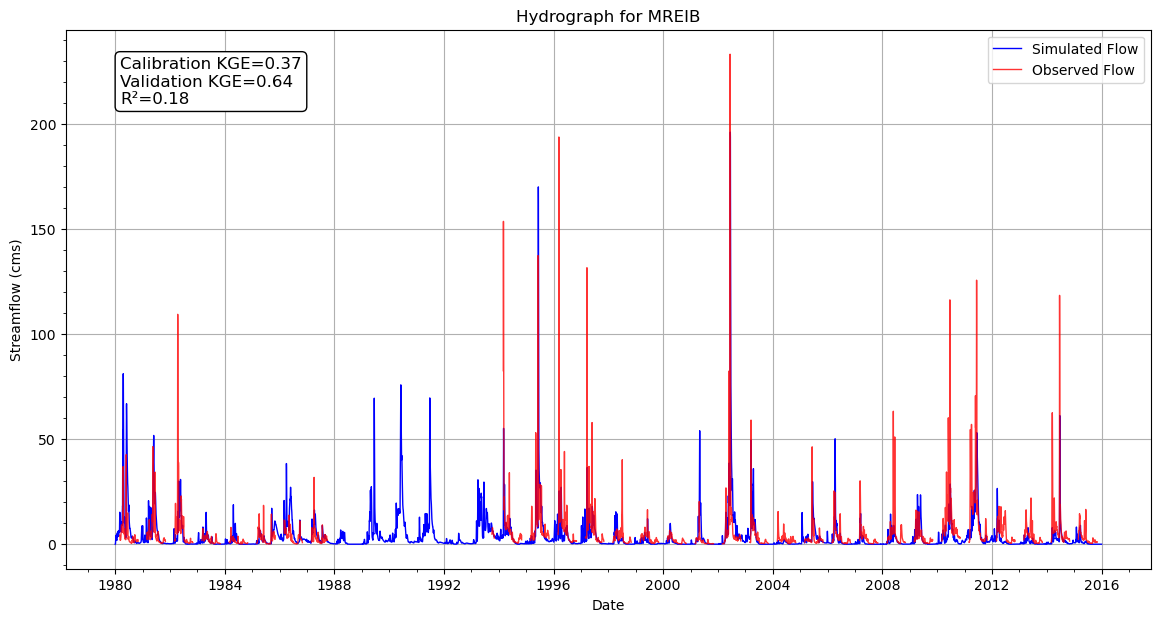

In [9]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(flow.index, flow['cout'], label='Simulated Flow', alpha= 1, linewidth= 1, color= 'blue')
plt.plot(flow.index, flow['rout'], label='Observed Flow', alpha= 0.8, linewidth= 1, color= 'red')

plt.xlabel('Date')
plt.ylabel('Streamflow (cms)')
plt.title('Hydrograph for MREIB')
plt.legend()
plt.grid(True)

# Add minor ticks
plt.minorticks_on()
plt.gca().xaxis.set_minor_locator(ticker.AutoMinorLocator())
plt.gca().yaxis.set_minor_locator(ticker.AutoMinorLocator())

# Add manual box with text
textstr = f'Calibration KGE=0.37\nValidation KGE=0.64\nR²={r2:.2f}'
props = dict(boxstyle='round', facecolor='white', alpha=1)
plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=props)

# Save plot as PNG file
plt.savefig('../../model/02_HYPE/plots/MREIB.png')

plt.show()